# Curso Python 2: Iniciación a la inteligencia artificial con Python
# Proyecto Final Parte 1

Previamente a realizar la carga de los datos, he revisado el fichero csv para comprobar el formato, y no se aprecia nada extraño, por lo que procederemos a cargarlos en un dataframe de pandas.

In [75]:
# Importamos el módulo Pandas
import pandas as pd

# Cargamos los datos en el dataframe
df_titanic = pd.read_csv('titanic.csv')

# Vemos la pinta que tienen los datos en el dataframe
print('-------------- dataframe.head() --------------')
print(df_titanic.head())
print('-------------- dataframe.info() --------------')
print(df_titanic.info())
print('-------------- dataframe.describe() --------------')
print(df_titanic.describe())

-------------- dataframe.head() --------------
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0

Una vez tenemos cargados los datos, procederemos a hacer un preprocesado de limpieza, que en este caso consistirá en eliminar los datos NaN del campo Age, que es el único campo numérico donde vemos que tenemos datos únicamente de 714 de los 891 pasajeros.

In [76]:
# Vemos los valores NaN antes de la limpieza
print(df_titanic[df_titanic['Age'].isna() == True])

# Eliminamos los valores NaN del campo Age
df_titanic = df_titanic.dropna(subset=['Age'])

# Comprobamos que ya no queda ningún valor NaN en el campo Age
print('---------- Tras la limpieza ----------')
print(df_titanic[df_titanic['Age'].isna() == True])

     PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Tic

Una vez cargados los datos, comenzamos a hacer el análisis exploratorio.

Primero veremos la relación entre varias variables de entrada:

In [77]:
# Cargamos las librerias matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sb

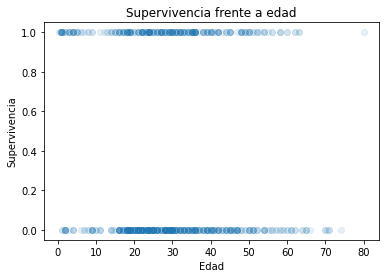

In [78]:
# Representamos con un scatter plot edad frente a supervivencia
plt.scatter(df_titanic['Age'], df_titanic['Survived'], alpha=0.1,)
plt.title("Supervivencia frente a edad")
plt.xlabel("Edad")
plt.ylabel("Supervivencia")
plt.show()

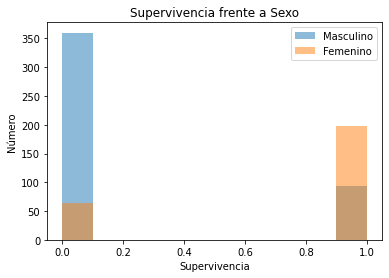

In [79]:
# Representamos dos histogramas de la distribución de supervivencia en función del sexo
plt.hist(df_titanic[df_titanic['Sex'] == 'male']['Survived'], alpha=0.5, label='Masculino')
plt.hist(df_titanic[df_titanic['Sex'] == 'female']['Survived'], alpha=0.5, label='Femenino')
plt.title("Supervivencia frente a Sexo")
plt.xlabel("Supervivencia")
plt.ylabel("Número")
plt.legend(loc='upper right')
plt.show()

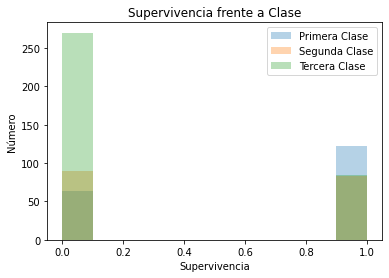

In [80]:
# Representamos tres histogramas de la distribución de supervivencia en función de la clase
plt.hist(df_titanic[df_titanic['Pclass'] == 1]['Survived'], alpha=0.33, label='Primera Clase')
plt.hist(df_titanic[df_titanic['Pclass'] == 2]['Survived'], alpha=0.33, label='Segunda Clase')
plt.hist(df_titanic[df_titanic['Pclass'] == 3]['Survived'], alpha=0.33, label='Tercera Clase')
plt.title("Supervivencia frente a Clase")
plt.xlabel("Supervivencia")
plt.ylabel("Número")
plt.legend(loc='upper right')
plt.show()

Con estas gráficas, podemos ver que aparentemente hay una clara relación entre los parámetros de edad, sexo, y clase, y la probabilidad de supervivencia. Visualizaremos ahora dicha relación de forma más clara con un swarmplot

/home/grogman/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


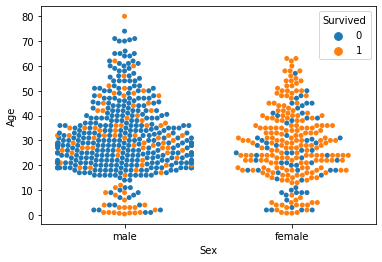

In [81]:
# Swarmplot para ver la relación entre sexo, edad, y supervivencia
sb.swarmplot(data=df_titanic, x='Sex', y='Age', hue='Survived')

El swarmplot muestra claramente la distribución de supervivientes y fallecidos en función del sexo y la edad. Podemos ver que se cumplió bastante la máxima de "Las mujeres y los niños primero".

/home/grogman/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


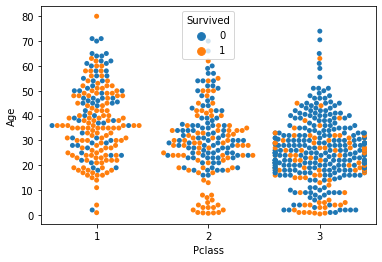

In [82]:
# Swarmplot para ver la relación entre clase, edad, y supervivencia
sb.swarmplot(data=df_titanic, x='Pclass', y='Age', hue='Survived')

En este otro swarmplot, podemos ver que también se cumple la máxima de "El dinero manda", ya que se ve una clara relación entre la clase de los pasajeros, y su probabilidad de supervivencia.

Como curiosidad, vamos a ver también si la longitud del nombre (un factor que podría ser indicativo de la posición social) tiene influencia en la tasa de supervivencia.

/home/grogman/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/grogman/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/grogman/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 36.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


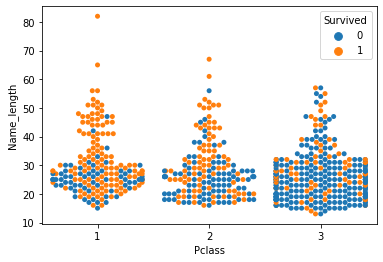

In [83]:
# Añadimos una columna al dataframe con la longitud del campo 'Name'
df_titanic['Name_length'] = df_titanic['Name'].str.len()

# Swarmplot para ver la relación entre longitud del nombre y supervivencia
sb.swarmplot(data=df_titanic, x='Pclass', y='Name_length', hue='Survived')

Podemos ver como, sobre todo en la primera y la segunda clase, parece que la probabilidad de supervivencia aumenta con la longitud del nombre, por lo que puede ser un factor interesante a tener en cuenta.

# Ejercicio: Hipotesis H0
Comenzaremos calculando la hipótesis nula, y su accuracy score.

In [84]:
# Calculamos la moda y el número de columnas del dataframe, y creamos el vector de la predicción H0
moda = df_titanic['Survived'].mode()[0]
columnas = len(df_titanic['Survived'])
H0_prediccion = [moda] * columnas

# Cargamos el método accuracy_score del módulo sklearn
from sklearn.metrics import accuracy_score

# Generamos el vector y_test, y calculamos el accuracy_score con respecto a H0 y lo mostramos en pantalla
y_test = df_titanic['Survived']
H0_accuracy = accuracy_score(y_test, H0_prediccion)
print(f'El accuracy_score de la hipótesis nula H0 es {H0_accuracy * 100:.2f}%')

El accuracy_score de la hipótesis nula H0 es 59.38%


La hipótesis nula ya nos da un accuracy_score cercano al 60%. Esto es lógico, ya que solo existen dos clases en este problema de clasificación, por lo que H0 siempre nos va a dar un accuracy_score superior al 50%.

Este valor de 59.38% será el mínimo accuracy_score que deberemos alcanzar con los modelos que desarrollemos.

# Ejercicio: Hipotesis "Las mujeres primero" (opcional)

In [85]:
# Creamos el valor de predicción de la hipótesis que llamaremos H_mujeres, tomando las filas en las que el campo 'Sex' corresponda a mujeres (multiplicamos por 1 para tener la predicción en tipo int por uniformidad, aunque no sería necesario para el accuracy_score ya que python es capaz de autopromocionar los booleanos a enteros 0 o 1 en este caso)
H_mujeres_prediccion = (df_titanic['Sex'] == 'female').tolist() * 1

# Calculamos el accuracy_score y lo mostramos en pantalla
H_mujeres_accuracy = accuracy_score(y_test, H_mujeres_prediccion)
print(f'El accuracy_score de la hipótesis "Las mujeres primero" es {H_mujeres_accuracy * 100:.2f}%')

El accuracy_score de la hipótesis "Las mujeres primero" es 78.01%


Vemos que ya tenemos un accuracy score superior a la hipótesis nula, lo que demuestra el valor del parámetro 'Sex' a la hora de predecir la supervivencia.

# Ejercicio: Un primer modelo

Comenzaremos quedándonos con un dataframe más "limpio", quitando datos redundantes como el id de pasajero, y otras variables no relacionadas o incompletas.

In [86]:
# Nos quedaremos con las columnas 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', y 'Name_length', y sacamos la columna 'Survived' a un dataframe aparte Y
X_df_titanic = df_titanic[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Name_length']]
Y_df_titanic = df_titanic['Survived']

Cambiamos las variables categóricas a numéricas

In [87]:
# Convertimos los campos de tipo object a tipo categorical, y nos quedamos con su código numérico
X_df_titanic['Sex'] = X_df_titanic['Sex'].astype('category').cat.codes
X_df_titanic['Embarked'] = X_df_titanic['Embarked'].astype('category').cat.codes

/home/grogman/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/grogman/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Ahora separaremos los datos para crear nuestros subconjuntos de entrenamiento y de test

In [88]:
# Importamos train_test_split de sklearn.model_selection para no hacerlo a mano y evitar equivocarnos
from sklearn.model_selection import train_test_split

# Creamos los subconjuntos de datos
X_df_titanic_train, X_df_titanic_test, Y_df_titanic_train, Y_df_titanic_test = train_test_split(X_df_titanic, Y_df_titanic)

Ahora procederemos a normalizar los datos para obtener mejores resultados con los predictores que entrenemos

In [89]:
# Importamos el Standard Scaler de sklearn.preprocessing para hacer el escalado automáticamente
from sklearn.preprocessing import StandardScaler

# Creamos un StandardScaler y lo ajustamos con los datos de entrenamiento
sc_titanic = StandardScaler()
sc_titanic.fit(X_df_titanic_train)

# Creamos nuevos dataframes con los datos normalizados
X_df_titanic_train_std = sc_titanic.transform(X_df_titanic_train)
X_df_titanic_test_std = sc_titanic.transform(X_df_titanic_test)

Hecho esto, comenzaremos a crear modelos clasificadores, y a entrenarlos. Comenzaremos por un clasificador de vecino más cercano.

In [90]:
# Importamos neighbors del módulo sklearn
from sklearn import neighbors

# Creamos un clasificador del tipo KNeighbors, inicialmente con 5 vecinos
knc_titanic = neighbors.KNeighborsClassifier(n_neighbors=5)

# Entrenamos el clasificador con los datos del subconjunto de entrenamiento
knc_titanic.fit(X_df_titanic_train_std, Y_df_titanic_train)

# Calculamos la predicción de los datos del subconjunto de test, y su accuracy_score, y lo mostramos en pantalla
knc_titanic_pred = knc_titanic.predict(X_df_titanic_test_std)
knc_titanic_accuracy = accuracy_score(knc_titanic_pred, Y_df_titanic_test)
print(f'El accuracy_score del clasificador KNeighbors con 5 vecinos es {knc_titanic_accuracy * 100:.2f}%')

El accuracy_score del clasificador KNeighbors con 5 vecinos es 76.54%


Podemos ver que superamos a la hipótesis "Las mujeres primero", aunque por muy poco.

Por curiosidad, vamos a hacer un barrido del parámetro n_neighbors de 1 a 15, para ver su influencia en el resultado. En esta ocasión hemos hecho el barrido a mano, aunque más adelante en el proyecto usaremos GridSearch para barrer los parámetros de los modelos.

In [91]:
for i in range(15):
    knc_titanic_n = neighbors.KNeighborsClassifier(n_neighbors=i+1)
    knc_titanic_n.fit(X_df_titanic_train_std, Y_df_titanic_train)
    knc_titanic_pred_n = knc_titanic_n.predict(X_df_titanic_test_std)
    knc_titanic_accuracy_n = accuracy_score(knc_titanic_pred_n, Y_df_titanic_test)
    print(f'El accuracy_score del clasificador KNeighbors con {i+1} vecinos es {knc_titanic_accuracy_n * 100:.2f}%')

El accuracy_score del clasificador KNeighbors con 1 vecinos es 76.54%
El accuracy_score del clasificador KNeighbors con 2 vecinos es 79.33%
El accuracy_score del clasificador KNeighbors con 3 vecinos es 73.74%
El accuracy_score del clasificador KNeighbors con 4 vecinos es 76.54%
El accuracy_score del clasificador KNeighbors con 5 vecinos es 76.54%
El accuracy_score del clasificador KNeighbors con 6 vecinos es 77.09%
El accuracy_score del clasificador KNeighbors con 7 vecinos es 79.33%
El accuracy_score del clasificador KNeighbors con 8 vecinos es 79.89%
El accuracy_score del clasificador KNeighbors con 9 vecinos es 81.56%
El accuracy_score del clasificador KNeighbors con 10 vecinos es 81.56%
El accuracy_score del clasificador KNeighbors con 11 vecinos es 83.24%
El accuracy_score del clasificador KNeighbors con 12 vecinos es 82.12%
El accuracy_score del clasificador KNeighbors con 13 vecinos es 79.33%
El accuracy_score del clasificador KNeighbors con 14 vecinos es 80.45%
El accuracy_sco

Podemos ver que a partir de 5 vecinos, los resultados no parecen mejorar, y oscilan alrededor del 80%, que es el valor que habíamos obtenido inicialmente con un n_neighbors de 5. En cualquier caso, dado que los resultados apenas mejoran la hipotesis de "Las muejeres primero", deberíamos intentar encontrar un clasificador mejor.

Ahora probaremos un clasificador de tipo perceptron.

In [92]:
# Importamos Perceptron del módulo sklearn.linear_model
from sklearn.linear_model import Perceptron

# Creamos un clasificador del tipo Perceptron
ppn_titanic = Perceptron()

# Entrenamos el clasificador con los datos del subconjunto de entrenamiento
ppn_titanic.fit(X_df_titanic_train_std, Y_df_titanic_train)

# Calculamos la predicción de los datos del subconjunto de test, y su accuracy_score, y lo mostramos en pantalla
ppn_titanic_pred = ppn_titanic.predict(X_df_titanic_test_std)
ppn_titanic_accuracy = accuracy_score(ppn_titanic_pred, Y_df_titanic_test)
print(f'El accuracy_score del clasificador de tipo Perceptron es {ppn_titanic_accuracy * 100:.2f}%')

El accuracy_score del clasificador de tipo Perceptron es 68.72%


Vemos que el accuracy_score del clasificador basado en Perceptron es mayor al de H0, pero menor al de "Las mujeres primero", por lo que no parece que sea un modelo adecuado para este caso.

Probaremos ahora con un Boosted Tree, o Gradient Boosting Classifier, para ver que resultados nos da.

In [93]:
# Importamos GradientBoostingClassifier del módulo sklear.ensemble
from sklearn.ensemble import GradientBoostingClassifier

# Creamos un clasificador GradientBoostinClassifier (Los parámetros los he sacado por prueba y error y mirando en google)
gbc_titanic = GradientBoostingClassifier(n_estimators=400, learning_rate=0.1, max_depth=2)

# Entrenamos el clasificador con los datos del subconjunto de entrenamiento
gbc_titanic.fit(X_df_titanic_train_std, Y_df_titanic_train)

# Calculamos la predicción de los datos del subconjunto de test, y su accuracy_score, y lo mostramos en pantalla
gbc_titanic_pred = gbc_titanic.predict(X_df_titanic_test_std)
gbc_titanic_accuracy = accuracy_score(gbc_titanic_pred, Y_df_titanic_test)
print(f'El accuracy_score del clasificador de tipo Boosted Tree es {gbc_titanic_accuracy * 100:.2f}%')

El accuracy_score del clasificador de tipo Boosted Tree es 78.77%


Aunque en algunos runs he obtenido un valor de hasta el 85% de accuracy_score, parece que este predictor se mantiene normalmente en valores del 80%, similares a los obtenidos con el clasificador KNeighbors.

Recapitulando, estos son los resultados que hemos obtenido hasta ahora:


In [94]:
print(f'El accuracy_score de la hipótesis nula H0 es {H0_accuracy * 100:.2f}%')
print(f'El accuracy_score de la hipótesis "Las mujeres primero" es {H_mujeres_accuracy * 100:.2f}%')
print(f'El accuracy_score del clasificador KNeighbors con 5 vecinos es {knc_titanic_accuracy * 100:.2f}%')
print(f'El accuracy_score del clasificador de tipo Perceptron es {ppn_titanic_accuracy * 100:.2f}%')
print(f'El accuracy_score del clasificador de tipo Boosted Tree es {gbc_titanic_accuracy * 100:.2f}%')

El accuracy_score de la hipótesis nula H0 es 59.38%
El accuracy_score de la hipótesis "Las mujeres primero" es 78.01%
El accuracy_score del clasificador KNeighbors con 5 vecinos es 76.54%
El accuracy_score del clasificador de tipo Perceptron es 68.72%
El accuracy_score del clasificador de tipo Boosted Tree es 78.77%


# Ejercicio: Selección de características (opcional)

Comenzamos creando y entrenando un clasificador de tipo Random Forest

In [95]:
# Importamos RandomForestClassifier del módulo sklear.ensemble
from sklearn.ensemble import RandomForestClassifier

# Creamos un clasificador RandomForestClassifier con los parámetros por defecto
rfc_titanic = RandomForestClassifier()

# Entrenamos el clasificador con los datos del subconjunto de entrenamiento
rfc_titanic.fit(X_df_titanic_train_std, Y_df_titanic_train)

# Calculamos la predicción de los datos del subconjunto de test, y su accuracy_score, y lo mostramos en pantalla
rfc_titanic_pred =rfc_titanic.predict(X_df_titanic_test_std)
rfc_titanic_accuracy = accuracy_score(rfc_titanic_pred, Y_df_titanic_test)
print(f'El accuracy_score del clasificador de tipo Random Forest es {rfc_titanic_accuracy * 100:.2f}%')

El accuracy_score del clasificador de tipo Random Forest es 81.01%


De nuevo obtenemos valores de accuracy_score en torno al 80% para este clasificador de tipo Random Forest.

Ahora echaremos un vistazo al atributo feature\_importances\_ para ver la influencia de cada una de las columnas de los datos de entrada en el cálculo de la predicción.

In [96]:
print('Lista de parámetros y sus importancias dentro del clasificador Random Forest:')
for index, element in enumerate(list(X_df_titanic.columns)):
    print(f'El peso del dato {element} es del {list(rfc_titanic.feature_importances_)[index] * 100:.2f}%')

Lista de parámetros y sus importancias dentro del clasificador Random Forest:
El peso del dato Pclass es del 11.35%
El peso del dato Sex es del 21.68%
El peso del dato Age es del 23.52%
El peso del dato Fare es del 20.85%
El peso del dato Embarked es del 2.91%
El peso del dato Name_length es del 19.69%


Podemos ver que el clasificador da bastante peso a los parámetros de sexo, edad, precio del billete, y longitud del nombre. Sin embargo da menos importancia a los parámetros de clase y lugar de embarque. En el caso de la clase, aunque inicialmente hayamos visto que era un parámetro influyente, probablemente sea redundante al tener también el dato del precio del billete, y probablemente ambos datos sean intercambiables.

A la vista de estos valores, me quedaría con los parámetros 'Sex', 'Age', 'Fare', y 'Name_length' para entrenar los modelos, y descartaría el resto de datos. No obstante, dado que 'Fare' y 'Pclass' sean probablemente intercambiables, y la longitud del nombre 'Name_length' es de cosecha propia, en el resto del proyecto usaré 'Sex', 'Age', y 'Pclass' como se indica en las instrucciones, por coherencia.

# Ejercicio: Ajuste de Hiperparámetros
Ahora entrenaremos un clasificador Random Forest, usando la funcion GridSearchCV para ajustar los hiperparámetros del clasificador.

En primer lugar nos quedaremos con las columnas que hemos indicado anteriormente, 'Sex', 'Age', y 'Pclass', de los datos originales sin normalizar, ya que en el caso del clasificador Random Forest no es necesaria la normalización. Además dado que haremos también cross validation, no separaremos los datos en conjuntos de entretamiento y test.

In [97]:
# Creamos un nuevo dataframe con las columnas de interés sin normalizar
X_df_titanic_subset = X_df_titanic[['Sex', 'Age', 'Pclass']]

# Importamos GridSerachCV del módulo sklearn.model_selection
from sklearn.model_selection import GridSearchCV

# Creamos un nuevo clasificador Random Forest
rfc_titanic_2 = RandomForestClassifier()

# Indicamos el grid de parámetros que queremos barrer (n_estimators, max_features y max_depth). Tomamos 5 valores centrados en el valor por defecto en el caso de n_estimators, y a partir de los valores por defecto en el caso de los otros dos hiperparámetros.
parameters = {'n_estimators' : [25, 50, 100, 200, 400],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [None, 5, 10, 25, 50]}
# Definimos el grid search con 5 validaciones cruzadas
grid_search = GridSearchCV(estimator = rfc_titanic_2, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1 ,verbose = 2)

# Lanzamos los entrenamientos y las cross validaciones con los datos de entrada y salida
grid_scores = grid_search.fit(X_df_titanic_subset, Y_df_titanic)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


In [98]:
# Mostramos el array de resultados de accuracy_score medio (de los 5 folds de cross validation) por combinación de hiperparámetros
print('Matriz de accuracy_score medio por combinación:\n')
print(grid_scores.cv_results_['mean_test_score'])

# Mostramos la mejor combinación de parámetros obtenida
rfc_titanic_2_accuracy = grid_scores.best_score_
print(f'\nCombinación de hiperparámetros con un accuracy score más alto ({rfc_titanic_2_accuracy * 100:.2f}%):\n')
print(grid_scores.best_params_)

Matriz de accuracy_score medio por combinación:

[0.80252142 0.81373978 0.81935389 0.81233133 0.81654683 0.80951443
 0.80673693 0.81374963 0.80812568 0.80673693 0.80534817 0.81512853
 0.80813553 0.80672708 0.81374963 0.79415936 0.79696641 0.79136216
 0.78995371 0.79695656 0.79553826 0.79415936 0.79693687 0.79414951
 0.79555796 0.79975377 0.79693687 0.79974392 0.79835517 0.79274106
 0.80816507 0.80674677 0.81515808 0.81235103 0.81236088 0.81092288
 0.81235103 0.81235103 0.80953413 0.81375948 0.80115237 0.81235103
 0.81513838 0.81235103 0.81655668 0.80669753 0.81654683 0.80955383
 0.81374963 0.80814538 0.79691717 0.81235103 0.81372993 0.80952428
 0.81094258 0.80811583 0.80536787 0.79970452 0.81235103 0.80955383
 0.80673693 0.80813553 0.81093273 0.80956368 0.80674677 0.81373978
 0.81236088 0.81513838 0.81514823 0.81794543 0.79696641 0.80393972
 0.81514823 0.81372993 0.81373978]

Combinación de hiperparámetros con un accuracy score más alto (81.94%):

{'max_depth': None, 'max_features': 'a

Tras mirar la documentación de RandomizedSearchCV, he visto que hace realmente lo mismo que GridSearchCV, pero sin llegar a recorrer todas las combinaciones de hiperparámetros, lo que puede ser útil con predictores más costosos de entrenar, o para explorar combinaciones de hiperparámetros mucho más grandes, por lo que en este caso, no vamos a obtener mejores resultados con RandomizedSearchCV que con GridSearchCV.

# Ejercicio: Ajuste de hiperparámetros (opcional)

En este caso ajustaremos los hiperparámetros de un predictor KNeighborsClassifier, como el que ya entrenamos anteriormente, y en el que ajustamos el hiperparámetro n_neighbors manualmente con un bucle. En este caso, además de n_neighbors, ajustaremos los hiperparámetros weights (función de peso de los vecinos), algorithm (algoritmo de calculo de los vecinos más cercanos), y el valor p de la métrica minkowski (calculo de la métrica de distancia a los vecinos).

En este caso volveremos a normalizar los datos completos usando un normalizador como hicimos en episodios anteriores :)

In [99]:
 # Creamos un nuevo StandardScaler y lo ajustamos con el subset de datos completos
sc_titanic_2 = StandardScaler()
sc_titanic_2.fit(X_df_titanic_subset)

# Creamos un nuevo dataframe con los datos normalizados
X_df_titanic_subset_std = sc_titanic_2.transform(X_df_titanic_subset)

In [100]:
# Creamos un nuevo clasificador KNeighborsClassifier
knc_titanic_2 = neighbors.KNeighborsClassifier()

# Indicamos el grid de parámetros que queremos barrer (n_neighbors, weights, algorithm y p).
parameters = {'n_neighbors' : range(20),
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
              'p' : [1, 2, 3]}
# Definimos el grid search con 5 validaciones cruzadas
grid_search_2 = GridSearchCV(estimator = knc_titanic_2, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1 ,verbose = 2)

# Lanzamos los entrenamientos y las cross validaciones con los datos de entrada y salida
grid_scores_2 = grid_search_2.fit(X_df_titanic_subset_std, Y_df_titanic)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
/home/grogman/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
 0.79136216 0.79136216 0.79136216 0.79136216 0.79136216 0.79136216
 0.80531863 0.81514823 0.80531863 0.81514823 0.80531863 0.81514823
 0.80392002 0.81373978 0.80392002 0.81373978 0.80392002 0.81373978
 0.81651729 0.82075249 0.81651729 0.82075249 0.81651729 0.82075249
 0.81794543 0.81514823 0.81794543 0.81514823 0.81794543 0.81514823
 0.81653698 0.81655668 0.81933419 0.81655668 0.81793559 0.81655668
 0.80534817 0.81373978 0.80534817 0.81373978 0.80394957 0.81373978
 0.81095243 0.81655668 0.81095243 0.81655668 0.80815523 0.81655668
 0.80533832 0.81654683 0.80533832 0.81654683 0.80533832 0.81654683
 0.80672708 0.81654683 0.80672708 0.81654683 0.80672708 0.81654683
 0.80674677 0.81654683 0.80814538 0.81654683 0.808

Podemos ver en la salida que alguna combinación de hiperparámetros concreta parece no funcionar, pero ignoraremos esos casos.

In [101]:
# Mostramos la mejor combinación de parámetros obtenida
knc_titanic_2_accuracy = grid_scores_2.best_score_
print(f'\nCombinación de hiperparámetros con un accuracy score más alto ({knc_titanic_2_accuracy * 100:.2f}%):\n')
print(grid_scores_2.best_params_)


Combinación de hiperparámetros con un accuracy score más alto (82.22%):

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


Ahora haremos lo mismo con un clasificador de tipo SVC o C-Support Vector Classification. En este caso, viendo los hiperparámetros, tampoco he llegado a profundizar lo suficiente como para entender lo que significan realmente desde el punto de vista de la matemática del modelo del clasificador. Viendo la documentación, y sin liarme demasiado con los distintos kernels disponibles, he decidido ajustar el hiperparámetro C (parámetro de regulación), y gamma (coeficiente usado por el kernel por defecto rbf).

In [102]:
# Importamos SVC del módulo sklearn.svm y numpy para usar arange
from sklearn.svm import SVC
import numpy as np

# Creamos un nuevo clasificador SVC
svc_titanic = SVC()

# Indicamos el grid de parámetros que queremos barrer (c, y gamma).
parameters = {'C' : np.arange(1.0,3.1,0.1),
              'gamma' : ['scale', 'auto']}
# Definimos el grid search con 5 validaciones cruzadas
grid_search_3 = GridSearchCV(estimator = svc_titanic, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1 ,verbose = 2)

# Lanzamos los entrenamientos y las cross validaciones con los datos de entrada y salida
grid_scores_3 = grid_search_3.fit(X_df_titanic_subset_std, Y_df_titanic)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


In [103]:
# Mostramos la mejor combinación de parámetros obtenida
svc_titanic_accuracy = grid_scores_3.best_score_
print(f'\nCombinación de hiperparámetros con un accuracy score más alto ({svc_titanic_accuracy * 100:.2f}%):\n')
print(grid_scores_3.best_params_)


Combinación de hiperparámetros con un accuracy score más alto (79.28%):

{'C': 2.000000000000001, 'gamma': 'scale'}


# Ejercicio: Persistencia

Comenzaremos por hacer de nuevo un resumen de los valores de accuracy obtenidos, para el elegir el clasificador que vamos a usar a partir de ahora.

In [104]:
print(f'El accuracy_score de la hipótesis nula H0 es {H0_accuracy * 100:.2f}%')
print(f'El accuracy_score de la hipótesis "Las mujeres primero" es {H_mujeres_accuracy * 100:.2f}%')
print(f'El accuracy_score del clasificador KNeighbors con 5 vecinos es {knc_titanic_accuracy * 100:.2f}%')
print(f'El accuracy_score del clasificador de tipo Perceptron es {ppn_titanic_accuracy * 100:.2f}%')
print(f'El accuracy_score del clasificador de tipo Boosted Tree es {gbc_titanic_accuracy * 100:.2f}%')
print(f'El accuracy_score del clasificador de tipo Random Forest es {rfc_titanic_accuracy * 100:.2f}%')
print(f'El accuracy_score del clasificador de tipo Random Forest con hiperparámetros ajustados es {rfc_titanic_2_accuracy * 100:.2f}%')
print(f'El accuracy_score del clasificador de tipo KNeighbors con hiperparámetros ajustados es {knc_titanic_2_accuracy * 100:.2f}%')
print(f'El accuracy_score del clasificador de tipo SVC con hiperparámetros ajustados es {svc_titanic_accuracy * 100:.2f}%')

El accuracy_score de la hipótesis nula H0 es 59.38%
El accuracy_score de la hipótesis "Las mujeres primero" es 78.01%
El accuracy_score del clasificador KNeighbors con 5 vecinos es 76.54%
El accuracy_score del clasificador de tipo Perceptron es 68.72%
El accuracy_score del clasificador de tipo Boosted Tree es 78.77%
El accuracy_score del clasificador de tipo Random Forest es 81.01%
El accuracy_score del clasificador de tipo Random Forest con hiperparámetros ajustados es 81.94%
El accuracy_score del clasificador de tipo KNeighbors con hiperparámetros ajustados es 82.22%
El accuracy_score del clasificador de tipo SVC con hiperparámetros ajustados es 79.28%


Si bien, los valores son muy similares, veo que los valores de accuracy_score de aquellos modelos en los que hemos hecho cross validation son un poco más bajos que cuando hemos hecho el mismo modelo sin cross validation. Entiendo que los valores con cross validation son más reales al haber sido entrenados con varios sets de datos de entrenamiento, aunque sean un poco más bajos, por lo que me voy a quedar con el clasificador Kneighbors con hiperparámetros ajustados a 'algorithm': 'brute', 'n_neighbors': 5, 'p': 2, y 'weights': 'uniform', que en este run en particular me ha dado un accuracy_score del 82.22%

Procederemos por tanto a entrenar un predictor con estos parámetros, que será el que haremos persistente mediante Pickle.

In [105]:
# Ahora vamos a hacer un entrenamiento normal sin crossvalidation, así que de nuevo separaremos nuestros datos en un conjunto de test, y otro de entrenamiento
X_df_titanic_subset_std_train, X_df_titanic_subset_std_test, Y_df_titanic_train, Y_df_titanic_test = train_test_split(X_df_titanic_subset_std, Y_df_titanic)

# Creamos un clasificador del tipo KNeighbors, con los parámetros seleccionados
knc_titanic_3 = neighbors.KNeighborsClassifier(algorithm = 'brute', n_neighbors=5, p=2, weights = 'uniform')

# Entrenamos el clasificador con los datos del subconjunto de entrenamiento
knc_titanic_3.fit(X_df_titanic_subset_std_train, Y_df_titanic_train)

# Calculamos la predicción de los datos del subconjunto de test, y su accuracy_score, y lo mostramos en pantalla
knc_titanic_3_pred = knc_titanic_3.predict(X_df_titanic_subset_std_test)
knc_titanic_3_accuracy = accuracy_score(knc_titanic_3_pred, Y_df_titanic_test)
print(f'El accuracy_score del clasificador KNeighbors con los hiperparámetros seleccionados es {knc_titanic_3_accuracy * 100:.2f}%')

El accuracy_score del clasificador KNeighbors con los hiperparámetros seleccionados es 83.24%


Y ahora mediante Pickle, almacenamos los datos necesarios, de forma serializada, en el fichero titanic_model.pkl

Los datos que almacenaremos son:
- Modelo KNeighborsClassifier knc_titanic_3 entrenado
- Scaler StandardScaler sc_titanic_2 ajustado
- Los nombres de las características de entrada:
    - 'Sex'
    - 'Age'
    - 'Pclass'
- El nombre del valor objetivo 'Survived'
- La asociación de categorías con sus valores numéricos


In [107]:
# Importamos el módulo pickle de la librería estándar
import pickle

# Creamos un diccionario con todos los datos que queremos almacenar en binario
info = {'modelo' : knc_titanic_3,
        'scaler' : sc_titanic_2,
        'feature_names' : ['Sex', 'Age', 'Pclass'],
        'target_name' : 'Survived',
        'categorias' : {'Sex' : {'female' : 0,
                                 'male' : 1}}}

# Guardamos el diccionario como datos binarios en el fichero titanic_model.pkl
with open('titanic_model.pkl', 'wb') as f:
    pickle.dump(info, f)

Y tras ejecutar, vemos que se ha generado el fichero binario titanic_model.pkl, que importaremos en la Parte 2 del proyecto.

Continuará...